## Part I: Regression analysis of Gapminder data

In this part of this project we will practice and experiment with linear regression using data from gapminder.org. We will use a subset of data provided by gapminder provided by Jennifer Bryan described in its github page

The data can be found here: https://github.com/jennybc/gapminder/blob/master/data-raw/08_gap-every-five-years.tsv

First we will import our data and check for missing values.

In [86]:
import pandas as pd

In [87]:
df = pd.read_csv("08_gap-every-five-years.tsv", sep='\t')
df.head(5)

,country,continent,year,lifeExp,pop,gdpPercap
0,Afghanistan,Asia,1952,28.801,8425333,779.445314
1,Afghanistan,Asia,1957,30.332,9240934,820.853030
2,Afghanistan,Asia,1962,31.997,10267083,853.100710
3,Afghanistan,Asia,1967,34.020,11537966,836.197138
4,Afghanistan,Asia,1972,36.088,13079460,739.981106


In [88]:
print(df.isnull().sum()) # check for missing values 

country      0
continent    0
year         0
lifeExp      0
pop          0
gdpPercap    0
dtype: int64


We have no missing values so we can move on to exploring our data.

### Scatter plot of life expectancy across time.

In [89]:
import matplotlib.pyplot as plt

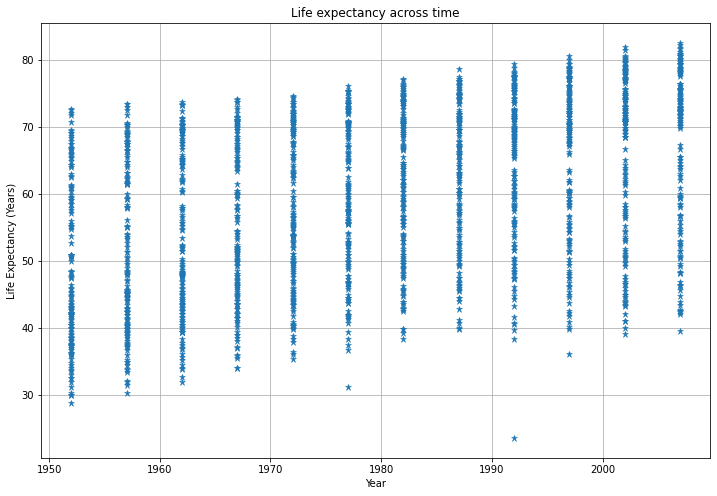

In [90]:
fig, ax = plt.subplots()

ax.plot(df['year'],df['lifeExp'],linestyle = 'none',marker = '*',markersize =7,markeredgewidth=.5) # scatter plot

ax.set_xlabel('Year')
ax.set_ylabel('Life Expectancy (Years)')
ax.set_title('Life expectancy across time')
ax.grid()
fig.set_figwidth(12)
fig.set_figheight(8)

In [91]:
df.corr() # check for correlation

,year,lifeExp,pop,gdpPercap
year,1.000000,0.435611,0.082308,0.227318
lifeExp,0.435611,1.000000,0.064955,0.583706
pop,0.082308,0.064955,1.000000,-0.025600
gdpPercap,0.227318,0.583706,-0.025600,1.000000


#### Is there a general trend  for life expectancy across time? Is it linear? 
Yes. There seems to be a linear trend of life expectancy incresing overtime based on the plot and as we can see from the table above lifeExp and year have a low positive, 0.435, correlation.

Now we will create two arrays for life expectancy and year and do a violin plot.

In [92]:
years = []
life_exp = []
for i,g in df.groupby('year'):
    years.append(i) # append each year
    life_exp.append(g['lifeExp']) # append values for lifeExp

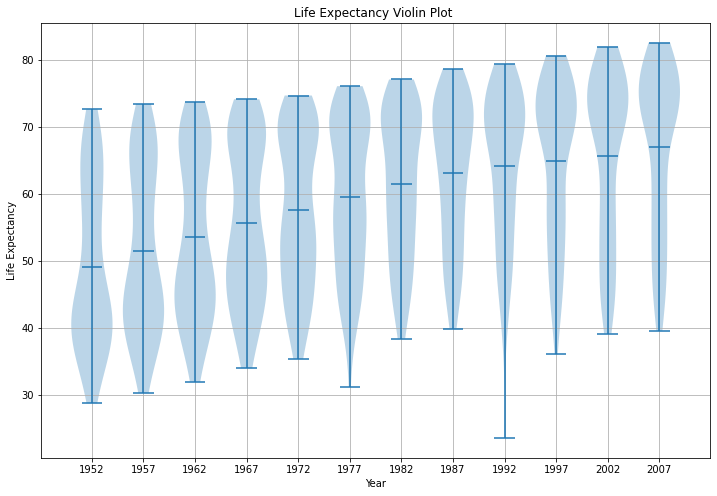

In [93]:
fig1, ax1 = plt.subplots()

ax1.violinplot(life_exp,years,widths=4,showmeans=True) # violin plot
ax1.set_xlabel("Year")
ax1.set_ylabel("Life Expectancy")
ax1.set_title("Life Expectancy Violin Plot ")
ax1.set_xticks(years)
ax1.grid()
fig1.set_figwidth(12)
fig1.set_figheight(8)

#### How can the distribution of life expectancy across countries for individual years be described? Is it skewed? Unimodal? or Symmetric around it’s center?


Overall life expectancy seems to increase. 
* In 1952 the median was less than 50 and the distribution is skewed towards the bottom and almost unimodal. 
* In 1957 its still skewed but with a higher median and its more bimodal.
* 1967 seems more bimodal and kind of symmetric about the median, same for 1972, with higher median.
* From 1977 on it starts to be skewed towards the top and its more unimodal from 1982 and on.
* 1992 has the most outliers but the distribution is still concentrated at the top. The median is increasing from 1992-2007 but at a slower rate. 

#### If we fit a linear regression model of life expectancy vs. year  and test for a relationship between year and life expectancy, can we reject the null hypothesis of no relationship?
Yes we can reject the no relationship null hypothesis. Because based on the above two plots there seems to be a linear relationship between year and life expectancy. 

#### What would a violin plot of residuals from the linear model in Question 3 vs. year look like?
I would also expect the violin plot of the residuals to have a linear relationship with year,since a linear regression line follows the mean of the distribution.

#### According to the assumptions of the linear regression model, what should that violin plot look like? 
The violin plot of the residuals should be unimodal and centered around 0,symmetric,if we assume a linear relationship.


## Part 2:

In [94]:
import numpy as np 
from sklearn import linear_model

We will now use sklearn to fit a linear model to our data.

In [95]:
rg = linear_model.LinearRegression()
X = df[['year']] # input variable
y = df[['lifeExp']] # output variable
rfit = rg.fit(X,y) # fit the model

In [96]:
y_int = rg.intercept_[0] # get y intercept from our model
m = rg.coef_[0][0] # get slope

In [97]:
print("Intercept {:.3}".format(y_int))
print("Slope {:.3}".format(m))

Intercept -5.86e+02
Slope 0.326


Next we will add a column for prediction and fill it with the predicted values from our model then calculate and input residuals into another column.

In [98]:
df['pridicted'] = rg.predict(X) # add column for pridicted life expectancy
df['residual'] = df['lifeExp'] - df['pridicted'] # calculate and add column of residual

In [99]:
df.head()

,country,continent,year,lifeExp,pop,gdpPercap,pridicted,residual
0,Afghanistan,Asia,1952,28.801,8425333,779.445314,50.512084,-21.711084
1,Afghanistan,Asia,1957,30.332,9240934,820.853030,52.141603,-21.809603
2,Afghanistan,Asia,1962,31.997,10267083,853.100710,53.771122,-21.774122
3,Afghanistan,Asia,1967,34.020,11537966,836.197138,55.400642,-21.380642
4,Afghanistan,Asia,1972,36.088,13079460,739.981106,57.030161,-20.942161


#### On average, by how much does life expectancy increase every year around the world?
Since slope is  $${Δ y}/{Δ x} = {Δ y}/{year} = 0.326$$
Therefore life expectancy increases by 0.326 years every year.

We will now import statsmodels because it makes getting the p-values a breeze.

In [100]:
import statsmodels.api as sm

We will fit our data using statsmodel to get p-values.

In [101]:
# create a OLS model and fit the data
model = sm.OLS(y, sm.add_constant(X)).fit() # X input var and y output var

In [102]:
model.pvalues # display pvalues

const    2.897807e-67
year     7.546795e-80
dtype: float64

#### Can we reject the null hypothesis of no relationship between year and life expectancy? Why?
Yes.The p-value for year is 7.546795e-80, and it represents the probability that the coefficient equals 0. We want a p-value that is less than 0.05 if it is we can reject the null hypothesis. In this case, the p-value for the year coefficient is much lower than 0.05, so we can reject the null hypothesis and say that there is a relationship between year and life expectancy and its not random.

## Part 3: Violin plot of residuals vs. year 

We will repeat the same step as above to do violin plot of residuals.

In [103]:
yrs = [] 
ris = []
for i,g in df.groupby('year'): # group by year
    yrs.append(i)
    ris.append(g['residual']) # append residuals for each year

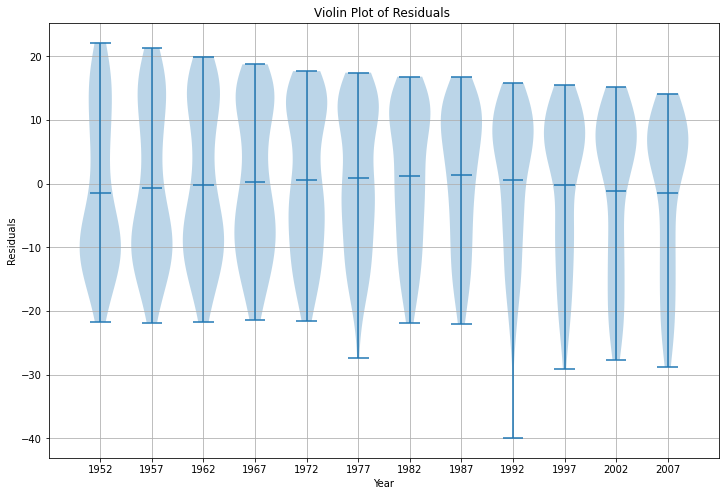

In [104]:
fig2, ax2 = plt.subplots()

ax2.violinplot(ris,yrs,widths=4,showmeans=True) # violin plot
ax2.set_xlabel("Year")
ax2.set_ylabel("Residuals")
ax2.set_title("Violin Plot of Residuals ")
ax2.set_xticks(yrs)
ax2.grid()
fig2.set_figwidth(12)
fig2.set_figheight(8)

As we can see from the plot above the median is around zero and that's what we expect from well-fitted linear regression model. It means our pridictions are consistent and they cluster around zero.

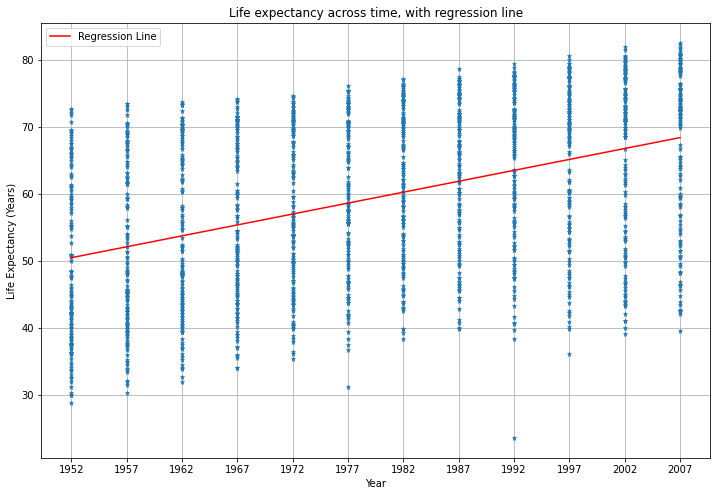

In [105]:
fig3, ax3 = plt.subplots()

ax3.plot(df['year'],df['lifeExp'],linestyle = 'none',marker = '*',markersize =5,markeredgewidth=.5) # scatter plot
ax3.plot(df['year'],df['pridicted'],linestyle = '-',color='r',label='Regression Line')
  
ax3.set_xlabel('Year')
ax3.set_ylabel('Life Expectancy (Years)')
ax3.set_title('Life expectancy across time, with regression line')
ax3.set_xticks(yrs)
ax3.legend()
ax3.grid()
fig3.set_figwidth(12)
fig3.set_figheight(8)

## Part 4: Box plot of residuals vs. continent 

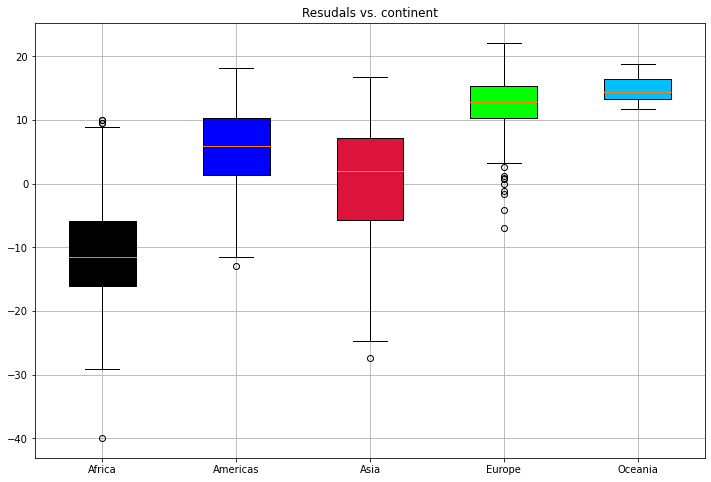

In [106]:
fig4, ax4 = plt.subplots()
# set up five dataframes containing only resudals from a continent
Af = df[df.continent == 'Africa'].residual
Am = df[df.continent == 'Americas'].residual
Oc = df[df.continent == 'Oceania'].residual
As = df[df.continent == 'Asia'].residual
Eu = df[df.continent == 'Europe'].residual
all = [Af,Am,As,Eu,Oc]
# labels for the boxplot
label = ['Africa', 'Americas', 'Asia', 'Europe', 'Oceania']

bplot = ax4.boxplot(all,patch_artist=True,labels=label) # box plot
ax4.set_title('Resudals vs. continent')
# iterate through box plots and fill each with a different color
cnames =['black','blue','crimson','lime','deepskyblue']
for i in bplot:
    for patch, color in zip(bplot['boxes'], cnames):
        patch.set_facecolor(color)

ax4.grid()
fig4.set_figwidth(12)
fig4.set_figheight(8)

####  Is there a dependence between model residual and continent? If so, what would that suggest when performing a regression analysis of life expectancy across time?
Yes, according to the plot above Africa seem to have the lowest residuals and Oceania the highest and everything else in the middle. If the residuals for all continents were similar, equally wrong, we could've claimed no relationship between continent and life expectancy and use just the year. We should add an interaction term for continent and year.

## Part 5: Scatter plot of life expectancy vs. year 

We will now do a scatter plot of each continent with its own resgression line and color to see how continent interacts with year.

In [107]:
tmp = df[['year','lifeExp','continent']] # set up a temp df containing year,lifeExp and continent only
# set up a df for each continent
Af = tmp[tmp['continent'] == 'Africa']
Am = tmp[tmp['continent'] == 'Americas']
Oc = tmp[tmp['continent'] == 'Oceania']
As = tmp[tmp['continent'] == 'Asia']
Eu = tmp[tmp['continent' ]== 'Europe']
all = [Af,Am,As,Eu,Oc] # set up a list containing continents

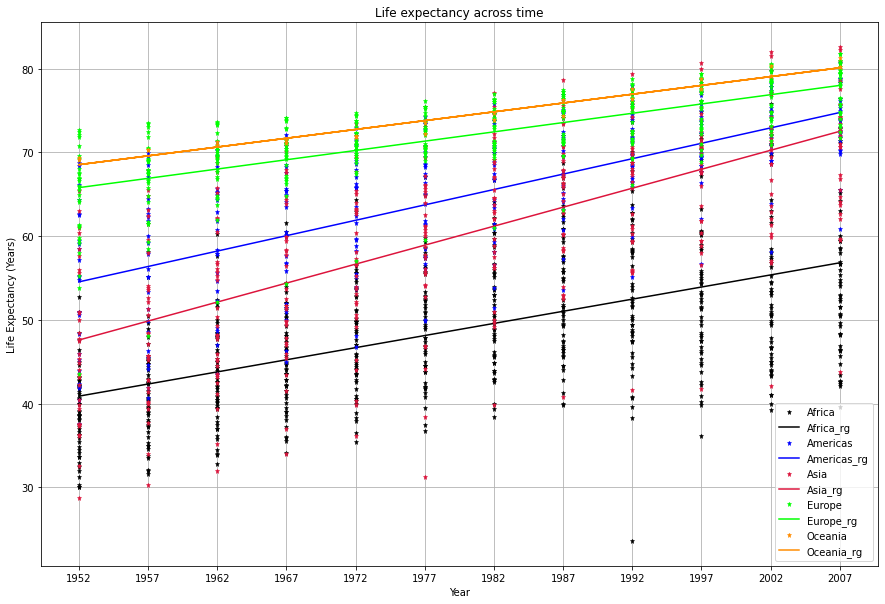

In [108]:
fig5, ax5 = plt.subplots()
cnames =['black','blue','crimson','lime','darkorange'] # different colors for each continent
label = ['Africa', 'Americas', 'Asia', 'Europe', 'Oceania'] # cotinent labels
reg_l =['Africa_rg', 'Americas_rg', 'Asia_rg', 'Europe_rg', 'Oceania_rg'] # reg line labels

ax5.set_prop_cycle(color = cnames)# set up different color for each plot
j = 0 # for iterating through color names and labels
for i in all: # iterate through each continent
    m,b = np.polyfit(i['year'],i['lifeExp'],1) # calculate slope and intercept for the regression line for each continent
    ax5.plot(i['year'],i['lifeExp'],linestyle = 'none',marker = '*',markersize =5,markeredgewidth=.5,label = label[j]) # scatter plot of a continent
    ax5.plot(i['year'],m*(i['year'])+b,color =cnames[j],label = reg_l[j]) # add a regression line
    j+=1

ax5.legend()
ax5.set_xlabel('Year')
ax5.set_ylabel('Life Expectancy (Years)')
ax5.set_title('Life expectancy across time')
ax5.set_xticks(yrs)
ax5.grid()
fig5.set_figwidth(15)
fig5.set_figheight(10)
   

#### Based on this plot, should the regression model include an interaction term for continent and year? Why?

Yes. Because as it can be seen from the plot above the continents have different regression lines and I expect each continent to interact with year differently.For instance,
* Africa has the lowest life expectancy and thus a regression line that is less steep,life expectancy increases at a slower rate and has lower maximum.
* The regression line for Asia is more steep and there is much more change in life expectancy across the years. 

## Part 6:
#### Linear regression model for life expectancy with a term for an interaction between continent and year. 

We will now create intraction term betwwen continent and year,to do that we will use pandas get dummies, with drop_first to avoid the dummy variable trap, and create columns for the intraction between year and each continent.

In [109]:
std_feat = df[['year','lifeExp']] # standard features
cont_feat = pd.get_dummies(df.continent,drop_first=True,prefix='continent') # continent features
com_feat = pd.concat([std_feat,cont_feat],axis=1) # combined features
con = df.continent.values 

for c in filter(lambda c:c != 'Africa',con):
    com_feat['year*'+c] = com_feat['continent_'+c]*com_feat['year'] # add column year*continent

com_feat.head()

,year,lifeExp,continent_Americas,continent_Asia,continent_Europe,continent_Oceania,year*Asia,year*Europe,year*Americas,year*Oceania
0,1952,28.801,0,1,0,0,1952,0,0,0
1,1957,30.332,0,1,0,0,1957,0,0,0
2,1962,31.997,0,1,0,0,1962,0,0,0
3,1967,34.020,0,1,0,0,1967,0,0,0
4,1972,36.088,0,1,0,0,1972,0,0,0


Now we will fit a linear regression model with X as input of all the combined features and y life expectancy.

In [110]:
X = com_feat.drop('lifeExp',axis=1)
y = com_feat['lifeExp']
rg = linear_model.LinearRegression()
rg.fit(X,y) # fit a linear regression model

LinearRegression()

In [111]:
y_int = rg.intercept_ # y intercept
m = rg.coef_ # slopes of combined features
l = ['year/Africa','continent_Americas ','continent_Asia','continent_Europe','continent_Oceania','year*Asia','year*Europe','year*Americas','year*Oceania']
s = set(zip(l,m)) # set up a set containing feature names and values of slope

In [112]:
print("Intercept{:.4}".format(y_int))
print("\nSlopes")
for i,j in s:
    print(i,"{:.4}".format(j))

Intercept-524.3

Slopes
continent_Americas  -138.8
year*Oceania -0.07926
year*Asia 0.1636
year*Americas 0.07812
year/Africa 0.2895
continent_Europe 156.8
continent_Oceania 182.3
year*Europe -0.0676
continent_Asia -312.6


In [113]:
com_feat['pridiction'] = rg.predict(X) # add column with pridictions 
com_feat['residual'] = com_feat['lifeExp'] - com_feat['pridiction'] # calculate and add column for residual


In [114]:
com_feat.head()

,year,lifeExp,continent_Americas,continent_Asia,continent_Europe,continent_Oceania,year*Asia,year*Europe,year*Americas,year*Oceania,pridiction,residual
0,1952,28.801,0,1,0,0,1952,0,0,0,47.604037,-18.803037
1,1957,30.332,0,1,0,0,1957,0,0,0,49.869649,-19.537649
2,1962,31.997,0,1,0,0,1962,0,0,0,52.135261,-20.138261
3,1967,34.020,0,1,0,0,1967,0,0,0,54.400873,-20.380873
4,1972,36.088,0,1,0,0,1972,0,0,0,56.666485,-20.578485


## Part 7: Violin plot of Residuals

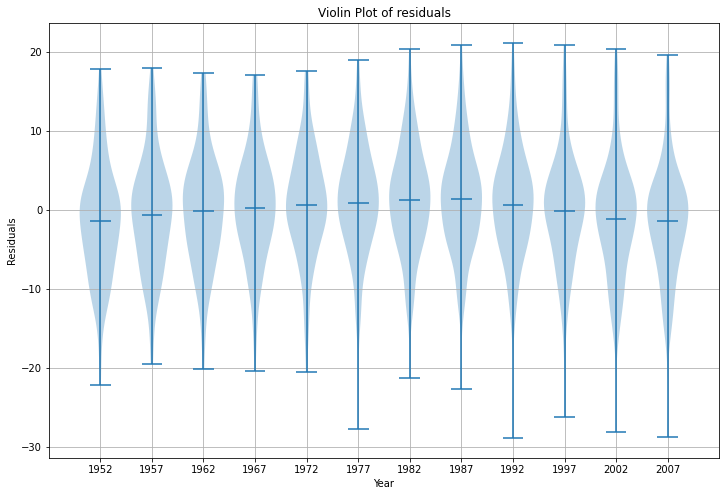

In [115]:
yrs = []
ris = []
for i,g in com_feat.groupby('year'):
    yrs.append(i) # add each year
    ris.append(g['residual']) # add residuals

fig5, ax5 = plt.subplots()

ax5.violinplot(ris,yrs,widths=4,showmeans=True)
ax5.set_xlabel("Year")
ax5.set_ylabel("Residuals")
ax5.set_title("Violin Plot of residuals")
ax5.set_xticks(yrs)
ax5.grid()
fig5.set_figwidth(12)
fig5.set_figheight(8)

As it can be seen from the plot above the residuals are unimodal and symmetric about the median, which is around zero. This means our pridictions are consistent over the years compared to the violin plots from excercise 3. Therfore by adding an intraction term for continent and year we were able to increase the accuracy of our model.

Now we will fit our data to the statsmodels linear regression because it is easier to obtain pvalues and summarize the model.

In [116]:
# create a OLS model and fit the data
model = sm.OLS(y, sm.add_constant(X)).fit()


In [117]:
p_val = model.pvalues
print("pvalues\n")
for index, value in p_val.items():
    print(index,":","{:.3}".format(value))

pvalues

const : 3.44e-53
year : 1.95e-62
continent_Americas : 0.0165
continent_Asia : 4.14e-09
continent_Europe : 0.00405
continent_Oceania : 0.287
year*Asia : 1.15e-09
year*Europe : 0.0142
year*Americas : 0.00758
year*Oceania : 0.36


### p-values
As it can be seen above all parameters except continent_Oceania and year*Oceania are less than 0.05.

In [118]:
print("Intercept{:.4}".format(y_int))
print("\nSlopes")
for i,j in s:
    print(i,"{:.4}".format(j))

Intercept-524.3

Slopes
continent_Americas  -138.8
year*Oceania -0.07926
year*Asia 0.1636
year*Americas 0.07812
year/Africa 0.2895
continent_Europe 156.8
continent_Oceania 182.3
year*Europe -0.0676
continent_Asia -312.6


#### On average, by how much does life expectancy increase each year for each continent? 

We extracted the slopes for each parameter from the regression model above,Excercise 6. How much the life expectancy increases in each continent per year is the slopes of the parameters with continents and year,i.e. year*Europe,year*Asia... Africa is the year itself. Therefore life expectancy increases in continents each year by,

* Oceania -0.07926 years
* Asia  0.1636
* Europe  -0.0676
* Americas  0.07812
* Africa  0.2895

We can see the results from statsmodels and sklearn's regression models are almost identical.

In [119]:
print(model.summary())

                            OLS Regression Results                            
Dep. Variable:                lifeExp   R-squared:                       0.693
Model:                            OLS   Adj. R-squared:                  0.691
Method:                 Least Squares   F-statistic:                     424.3
Date:                Thu, 15 Jul 2021   Prob (F-statistic):               0.00
Time:                        20:37:54   Log-Likelihood:                -5771.9
No. Observations:                1704   AIC:                         1.156e+04
Df Residuals:                    1694   BIC:                         1.162e+04
Df Model:                           9                                         
Covariance Type:            nonrobust                                         
                         coef    std err          t      P>|t|      [0.025      0.975]
--------------------------------------------------------------------------------------
const               -524.2578     32

## Part II: Classification

For this part we will use sklearn's breast cancer dataset which has 569 samples with 30 numeric pridictive attributes and two classes,benign and malignant. We will then use linear SVM and k-NN classification algorithms and do a 10-fold cross-validation and paired t-test to compare their performance. 

In [120]:
from sklearn import datasets
from sklearn.model_selection import train_test_split

cancer = datasets.load_breast_cancer() # load the cancer dataset
dff = pd.DataFrame(cancer.data, columns=cancer.feature_names) # convert to pandas dataframe
dff_target = pd.DataFrame(cancer.target)

In [121]:
dff.head()

,mean radius,mean texture,mean perimeter,mean area,mean smoothness,mean compactness,mean concavity,mean concave points,mean symmetry,mean fractal dimension,...,worst radius,worst texture,worst perimeter,worst area,worst smoothness,worst compactness,worst concavity,worst concave points,worst symmetry,worst fractal dimension
0,17.99,10.38,122.80,1001.0,0.11840,0.27760,0.3001,0.14710,0.2419,0.07871,...,25.38,17.33,184.60,2019.0,0.1622,0.6656,0.7119,0.2654,0.4601,0.11890
1,20.57,17.77,132.90,1326.0,0.08474,0.07864,0.0869,0.07017,0.1812,0.05667,...,24.99,23.41,158.80,1956.0,0.1238,0.1866,0.2416,0.1860,0.2750,0.08902
2,19.69,21.25,130.00,1203.0,0.10960,0.15990,0.1974,0.12790,0.2069,0.05999,...,23.57,25.53,152.50,1709.0,0.1444,0.4245,0.4504,0.2430,0.3613,0.08758
3,11.42,20.38,77.58,386.1,0.14250,0.28390,0.2414,0.10520,0.2597,0.09744,...,14.91,26.50,98.87,567.7,0.2098,0.8663,0.6869,0.2575,0.6638,0.17300
4,20.29,14.34,135.10,1297.0,0.10030,0.13280,0.1980,0.10430,0.1809,0.05883,...,22.54,16.67,152.20,1575.0,0.1374,0.2050,0.4000,0.1625,0.2364,0.07678


## Linear Support Vector Machine
This algorithm creates a hyperplane which separates our data into classes. In other words it maps the training examples as points in space and maximize the widith of the gap between these points, creating separate catagories.SVM uses hyperparameters kernel,regularization and gamma.
* Kernel:Can be linear, polynomial, or radial basis function (RBF). According to my research [A Practical Guide to Support Vector Classifcation,Appendix C.](http://www.google.be/url?sa=t&rct=j&q=libsvm%20parameter%20search%20filetype%3apdf&source=web&cd=1&ved=0CCoQFjAA&url=http://www.csie.ntu.edu.tw/~cjlin/papers/guide/guide.pdf&ei=6bAuUrqCIoKn0AWI7IDwDg&usg=AFQjCNFol0McRktHC6gsBxKXqQMvmQUFeg&sig2=B_UX_55hQoHLm3rsCKUInw&bvm=bv.51773540,d.bGE)If we have large number of features,30 in our case,a nonlinear mapping doesn't improve performance. So we can use linear kernel.
* Regularization (C): is a penality parameter which is basically an error term and tells the SVM how much error is bearable.
* Gamma: specifies how closely we want the model to fit our data, lower gamma means we will loosely fit out data while higher gamma means the model will exactly fit the training data.

We are going to use sklearn's GridSearchCV to find the best C and Gamma. Because it takes too long to test all possible fits to find the best combination we will limit our candidates for C to {1,10,100} and gamma {1,0.1,0.01}, using 5 folds will result in 45 different fits. I initially used 5 values for C and gamma each,125 total fits, and it took forever to run so I had to limit my choices to 3 each.


In [122]:
X_tr,X_ts,y_tr,y_ts = train_test_split(cancer.data, cancer.target, test_size=0.2,random_state=42) # split our data into training and testing set

In [123]:
from sklearn import svm
from sklearn.model_selection import GridSearchCV

# define parameter range
param_grid = {'C': [ 1, 10, 100],
			'gamma': [1, 0.1, 0.01],
			'kernel': ['linear']}
grid = GridSearchCV(SVC(), param_grid, refit = True, verbose = 1)
# fitting the model for grid search
grid.fit(X_tr, y_tr)


Fitting 5 folds for each of 9 candidates, totalling 45 fits


GridSearchCV(estimator=SVC(),
             param_grid={'C': [1, 10, 100], 'gamma': [1, 0.1, 0.01],
                         'kernel': ['linear']},
             verbose=1)

In [ ]:
# print best parameter after tuning
print(grid.best_params_)

# print how our model looks after hyper-parameter tuning
print(grid.best_estimator_)


We will now run our model with C = 100 and gamma = 1 .

In [ ]:
clf = svm.SVC(kernel='linear',C=100, gamma=1)
clf.fit(X_tr,y_tr)

#### Cross-validation
To perform 10-fold cross validation we'll import sklearn's cross_val_score and test the performance of our model.

In [ ]:
from sklearn.model_selection import cross_val_score

X = cancer.data
y = cancer.target
svm_scores = cross_val_score(clf, X, y, cv=10,scoring='accuracy')

In [ ]:
print(svm_scores) # print cross validation scores

## k-NN classification 
k-NN classification uses k-most similar records from the entire dataset to make pridictions. Just like above we need to optimize our hyperparameters,the number of neighbors and weights. We're going to use sklearn's GridSearchCV to find the optimal number of neighbors and weights. 
* We can also choose the type of algorithm that is used to compute the nearest neighbors. Brute force,Ball tree,KD tree or auto. According to scikit's documentation auto choses the most appropriate algorithm based on our data. Auto selects brute force if number of features > 15 or k >= number of samples /2 or if input data is sparse. Since we have 30 features we can assume our model will use brute force to compute the nearest neighbors. 

In [ ]:
X_train, X_test, y_train, y_test = train_test_split(X, y,test_size=0.2, random_state=42) # split data


In [ ]:
from sklearn.neighbors import KNeighborsClassifier

# we will test number of neighbors ranging from 1-50, and between uniform and distance weights
parameters = {"n_neighbors": range(1, 50),"weights": ["uniform", "distance"] }

knn = KNeighborsClassifier()   

gridsearch = GridSearchCV(knn, parameters)
gridsearch.fit(X_train, y_train)
GridSearchCV(knn,param_grid={'n_neighbors': range(1, 50),'weights': ['uniform', 'distance']})
gridsearch.best_params_ # display best combination parameters

We will now fit our data into the model with n_neighbors= 8, weights = uniform.

In [ ]:
# run our model with optimal parameters
knn = KNeighborsClassifier(n_neighbors = 8, weights = 'uniform')
knn.fit(X_tr, y_tr) # fit the model with training data

#### Cross-validation

In [ ]:
X = cancer.data
y = cancer.target
knn_scores = cross_val_score(knn, X, y, cv=10, scoring='accuracy') # ten-fold cross-validation
print(knn_scores)

### Paired t-test
Finally we will perform a paired t-test to compare the performance of the linearSVM and kNN model. To do this we will import stats scipy and pass in our two sets of scores. 

In [ ]:
from scipy import stats

res = stats.ttest_rel(svm_scores,knn_scores)

In [ ]:
print(res)

As it can be seen above we have a p-value of 0.127, which is higher than 0.05, so we can't reject the null hypothesis that our models had an identical average performance. In other words we can't conclude a significant difference exists between the performance of our models.